In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

## Testing means (with 1 sample)

Are squirrels starving? :(

In [ ]:
# here I generate fake data to have slighly small squirrels
# you can pretend you don't see that ;)
np.random.seed(42)
pop = pd.Series(np.random.exponential(1, 10000))
samp_size = 80
squirrels = pop.sample(samp_size)
squirrels = abs(squirrels - 0.1)

In [ ]:
# Zoological registers say that squirrels in that area weight on average 1kg
# The mean of our sample, however, is:
squirrels_mean = squirrels.mean()
squirrels_mean

0.8919614547194297

In [ ]:
0.88
0.90

#mean =0.89
#std=0.003

0.887, 0.894, 0.891, 0.882

In [ ]:
squirrels.std()

0.9373970676088735

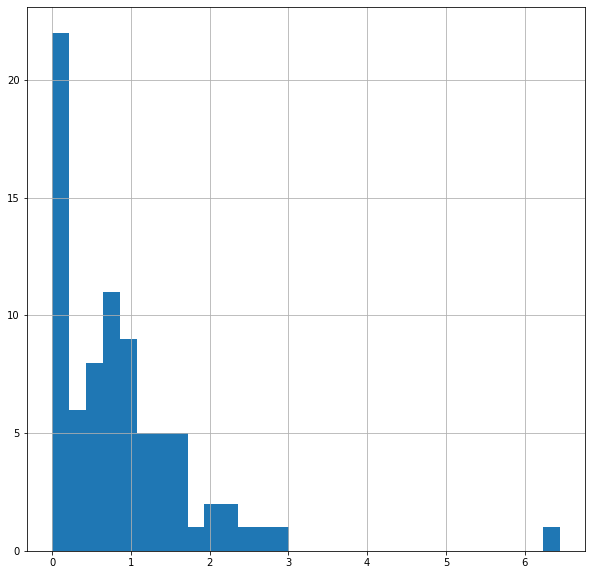

In [ ]:
squirrels.hist(bins=30, figsize=(10,10))

In [ ]:
# Is the mean of our sample smaller than 1kg due to chance (H0), or because the population
# of squirrels from where the sample comes has, in fact, a different mean than 1kg (H1)?

# The Standard Error of the Mean will tell us how far should we expect the mean of our sample to be 
# from the true mean of the population. Let's compute it:

np.std(squirrels)/np.sqrt(samp_size)

# Read more about the Standard Error of the Mean in page 171 of OpenIntro Statistics.


0.10414709228911492

In [ ]:
sem_squirrels = stats.sem(squirrels, ddof=0)
sem_squirrels

0.10414709228911492

In [ ]:
squirrels_mean + 3 * stats.sem(squirrels, ddof=1)

1.2063739894817909

In [ ]:
squirrels_mean - 3 * stats.sem(squirrels, ddof=1)

0.5775489199570686

In [ ]:
# That still doesn't answer the question: Are squirrels starving?
# We can rephrase this question in mathematical terms:
# What's the probability that the mean of our sample (0.89) comes from a population with mean = 1?
# Or, in other words: is there a statistically significant difference between the mean of our sample 
# and the reference of 1kg?

# The Null Hypothesis (H0) will be: mean(population) = 1
# The Alternative Hypothesis (H1 or HA) will be mean (population) != 1.

# (If you're wondering why we don't test for just mean < 1: having overweight squirrels is totally possible,
# and we had to decide which test to use (1-tailed or 2-tailed) before taking the sample.)

# We test a difference between 1 sample and 1 single value with a 1-sample t-test.
# We can do the t-test with a single python function: scipy.stats.ttest_1samp. 
# But first, let's unfold the underlying process.

# The Central Limit Theorem tells us that no matter the true underlying distribution of the population,
# if we take multiple samples of a fixed size and we plot the means of these samples, they will form a 
# normal distribution. This distribution is called the "Sample distribution of the sample means".

# The "Sample distribution of the sample mean" has these 3 properties:
    # 1) its mean is equal to the mean of the population (we're assuming it's 1)
    # 2) its standard deviation is equal to the standard error of our estimate (we computed it above)
    # 3) it resembles a normal distribution.

In [ ]:
# Simulate the "Sample distribution of the sample means"
# normal
# mean = 1
# std = sem_squirrels

In [ ]:
sem_squirrels = stats.sem(squirrels, ddof=1)
sem_squirrels

0.10480417825412036

In [ ]:
sampl_dist_sampl_means = np.random.normal(loc=1, # mean
                                          scale = sem_squirrels, #std
                                          size = 1000000
                                         )

In [ ]:
std_rias = sampl_dist_sampl_means.std()

NameError: ignored

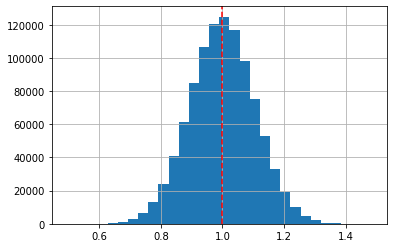

In [ ]:
import matplotlib.pyplot as plt
sampl_dist_sampl_means = pd.Series(sampl_dist_sampl_means)
sampl_dist_sampl_means.hist(bins=30);
plt.axvline(1, color="red", linestyle="--");

plt.axvline(1+2*std_rias, color="yellow", linestyle="--");
plt.axvline(1-2*std_rias, color="yellow", linestyle="--");


Let's find the z score for our sample. The z score is the number of standard deviations that a number is away from the mean of a normal distribution.

In [ ]:
sem_squirrels

0.10480417825412036

In [ ]:
squirrels_mean

0.8919614547194297

In [ ]:
z_score = (1 - squirrels_mean) / sem_squirrels
z_score

1.0308610503925477

Our z score is 1.03. To find the p value for that score, we can use the cumulative distribution function fot the normal distribution. We'll have to double that value, since we want to look at both extremes of the distribution.

In [ ]:
# confidence level = alpha = 0.99
# reject the null with p < 0.01
p_value = stats.norm.cdf(-z_score)*2
p_value

0.30260598405571315

We can also look for the p-value in a t distribution with a n-1 degrees of freedom. The difference is neglegible.

In [ ]:
stats.t.cdf(-z_score, df = 80-1)*2

0.30575171020498243

## Using scipy's ttest_1samp

Above, we manually performed a z test, which is almost identical to a t test for big samples. Read more about the t-distribution here: https://en.wikipedia.org/wiki/Student%27s_t-distribution

In [ ]:
from scipy.stats import ttest_1samp


In [ ]:
tscore, pvalue = ttest_1samp(a = squirrels, popmean= 1)
pvalue

0.30575171020498243

In [ ]:
# pvalue > 0.05 --> keep the null hypothesis
# we can't be sure that squirrels are starving
# mean pop squirrels = 1

### Your turn:

We have the hypothesis that our students are super smart. So we took a random sample of our students and asked them to perform an IQ test.

45 WBS CODING SCHOOL students took the IQ test and their result was 130. The average IQ is 100. Test whether or not WBSCS students are different from the regular population.

In [ ]:
# H0: WBSCS students have the same IQ as the general population = 100. 
#     The observed difference is due to chance.

# H1: WBSCS students have a higher / different IQ than the general population.
#                           higher --> 1 tail
#                           different --> 2 tails

In [ ]:
wbs_students = [172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 
 73, 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 
 108, 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 
 135, 116, 182, 144, 127, 216, 71, 200, 182, 71, 129]

In [ ]:
np.mean(wbs_students)

130.0222222222222

In [ ]:
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(a = wbs_students, 
                                   popmean = 100)

p_value

9.338735146790408e-05

In [ ]:
# pvalue < 0.05 --> prove that the null is very unlikely --> we reject the null 
#. --> WBSCS students are smarter than the average population